In [1]:
import matplotlib.pyplot as plt
import cPickle as pickle
import tensorflow as tf
import sys
import os
sys.path.append('/mnt/zye/show-attend-and-tell/')
from core.solver import CaptioningSolver
from core.model import CaptionGenerator
from core.utils import load_coco_data
from core.bleu import evaluate

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0)  # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2
print 'success'

success


In [2]:
data = load_coco_data(data_path='/mnt/zye/show-attend-and-tell/data', split='val')
test_data=load_coco_data(data_path='/mnt/zye/show-attend-and-tell/data',split='test')
with open('/mnt/zye/show-attend-and-tell/data/train/word_to_idx.pkl', 'rb') as f:
    word_to_idx = pickle.load(f)

image_idxs <type 'numpy.ndarray'> (24486,) int32
file_names <type 'numpy.ndarray'> (5063,) <U51
captions <type 'numpy.ndarray'> (24486, 17) int32
Elapse time: 0.01
image_idxs <type 'numpy.ndarray'> (24486,) int32
file_names <type 'numpy.ndarray'> (5063,) <U51
captions <type 'numpy.ndarray'> (24486, 17) int32
Elapse time: 0.00


In [3]:
print os.getcwd()
os.chdir('/mnt/zye/show-attend-and-tell/')
print os.getcwd()

/home/zye/Desktop
/mnt/zye/show-attend-and-tell


In [4]:
model = CaptionGenerator(word_to_idx, dim_feature=[196, 512], dim_embed=512,
                                   dim_hidden=1024, n_time_step=16, prev2out=True, 
                                             ctx2out=True, alpha_c=1.0, selector=True, dropout=True)

In [5]:
solver = CaptioningSolver(model, data, data,test_data=test_data, n_epochs=20, batch_size=128, update_rule='adam',
                                      learning_rate=0.001, print_every=100, save_every=1, image_path='./image/val2014_resized',
                                pretrained_model=None, model_path='./model/lstm', test_model='./model/lstm/model-18',
                                 print_bleu=False, log_path='./log/')

INFO:tensorflow:Restoring parameters from ./model/lstm/model-18


success


Sampled Caption: a man and a woman sitting on a bench .


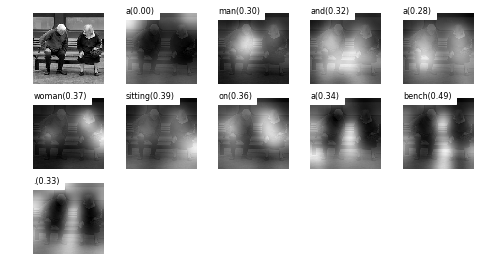

Sampled Caption: a pizza with cheese and tomatoes on a plate .


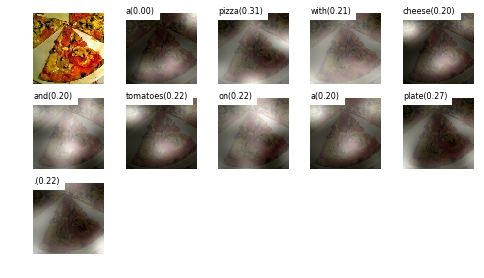

Sampled Caption: a young boy is playing with a wii controller .


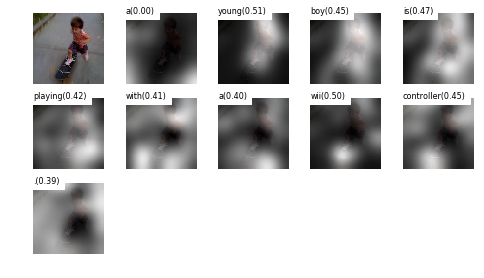

Sampled Caption: a clock on a stone wall with a clock on it .


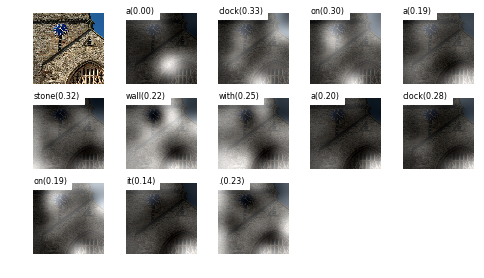

Sampled Caption: a black and white photo of a black stove .


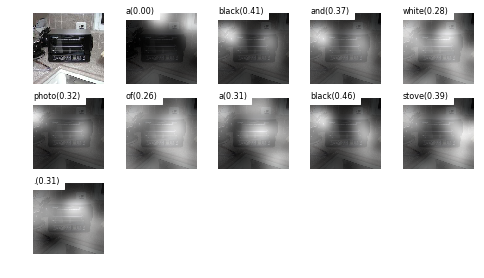

Sampled Caption: a plate of food with broccoli and a bowl of soup .


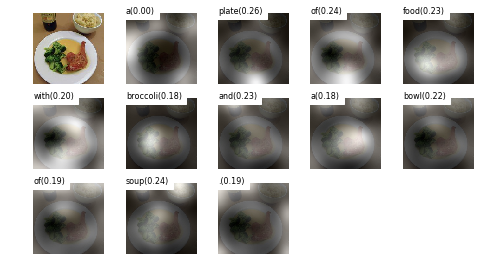

Sampled Caption: a man and a woman are standing in a room .


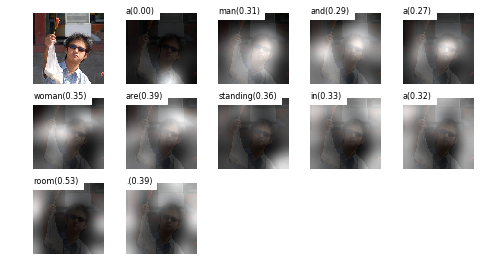

Sampled Caption: a person is holding a plate with a donut .


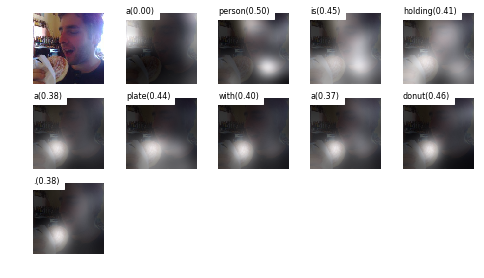

Sampled Caption: a large blue and white bus on a street .


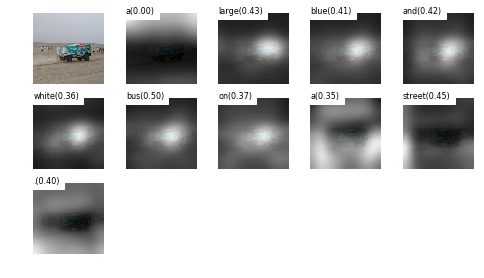

Sampled Caption: an elephant is standing in the water near a tree .


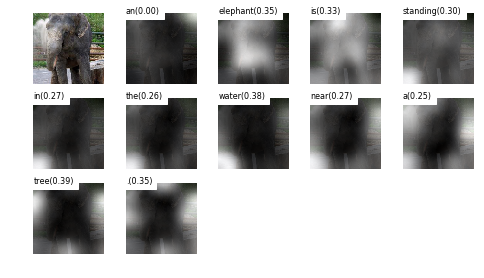

Saved ./data/test/test.candidate.captions.pkl..


In [6]:
solver.test()

image_idxs <type 'numpy.ndarray'> (19589,) int32
file_names <type 'numpy.ndarray'> (4048,) <U51
features <type 'numpy.ndarray'> (4048, 196, 512) float32
captions <type 'numpy.ndarray'> (19589, 17) int32
Elapse time: 1.15


{'reflen': 43408, 'guess': [43989, 39937, 35885, 31833], 'testlen': 43989, 'correct': [29093, 12382, 5232, 2401]}
ratio: 1.01338462956
Bleu_1:	0.661369887927
Bleu_2:	0.452824472132
Bleu_3:	0.310364129211
Bleu_4:	0.217912572998
METEOR:	0.217213601321
ROUGE_L: 0.518324778652
CIDEr:	0.683173385807


Sampled Caption: a sign that is on a pole in front of a building .


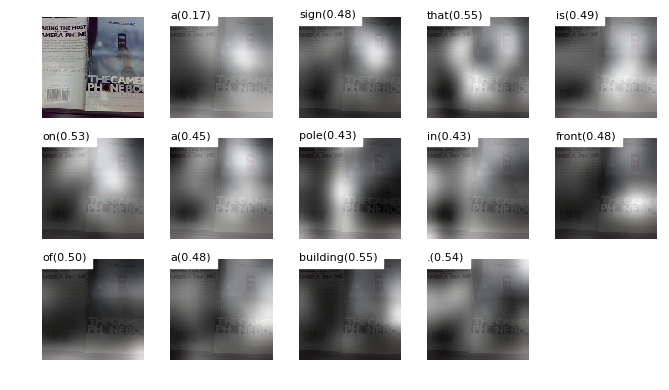

Sampled Caption: a train is traveling down the tracks in the city .


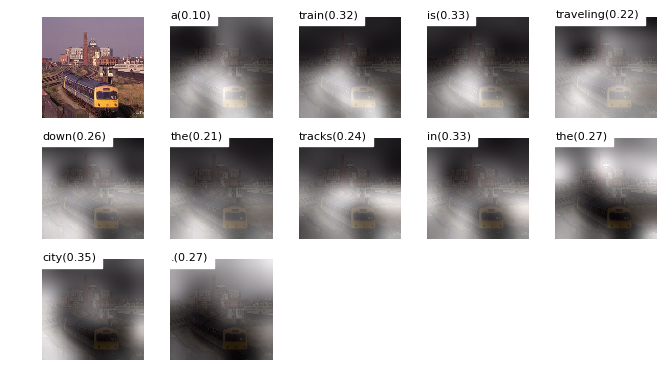

Sampled Caption: a giraffe standing in a field with tall grass .


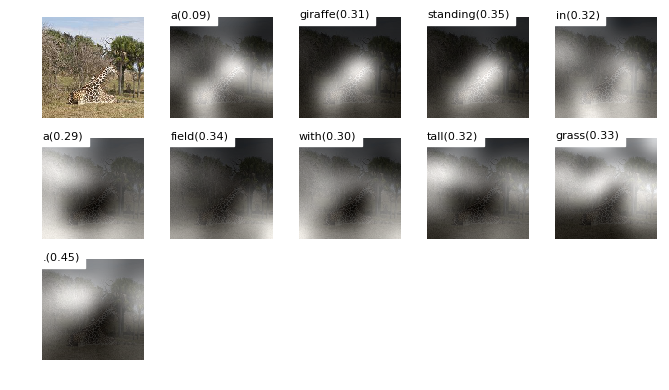

Sampled Caption: a woman is holding a dog in a parking lot .


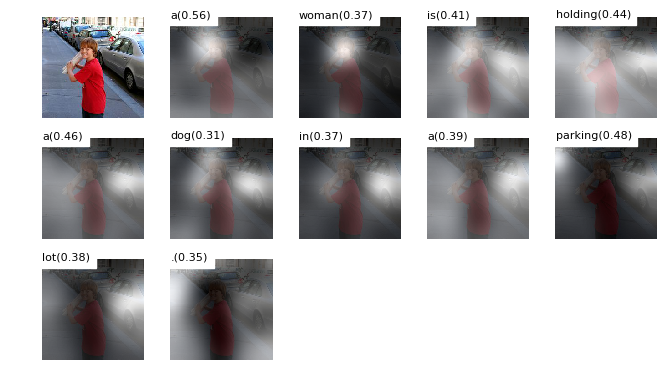

Sampled Caption: a woman standing in a kitchen with a refrigerator .


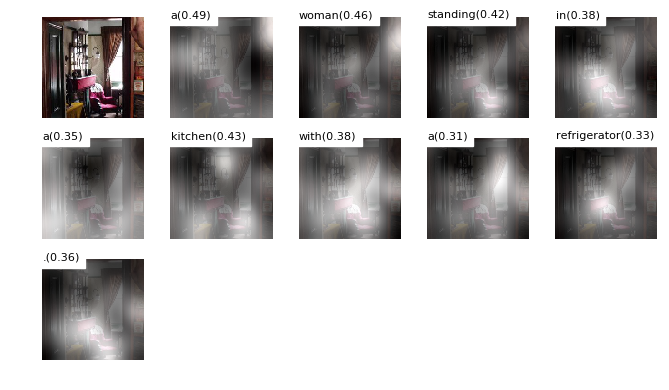

Sampled Caption: a polar bear is swimming in the water .


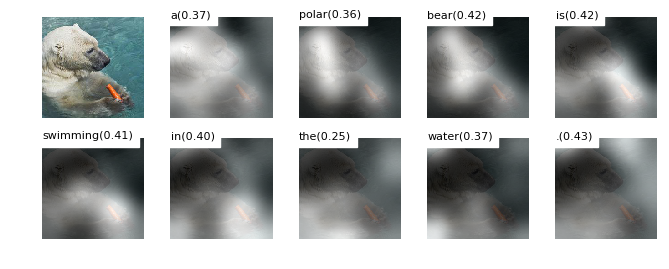

Sampled Caption: a man standing in front of a tv holding a wii remote .


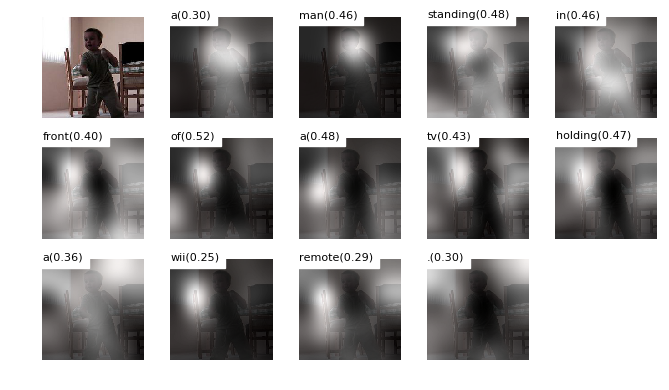

Sampled Caption: a woman is sitting on a couch with a laptop .


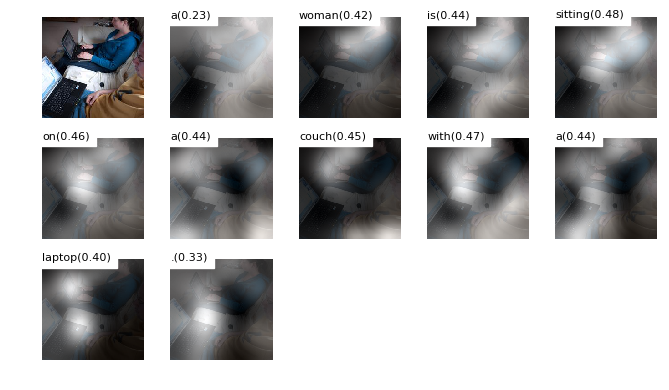

Sampled Caption: a group of elephants standing in a fenced in area .


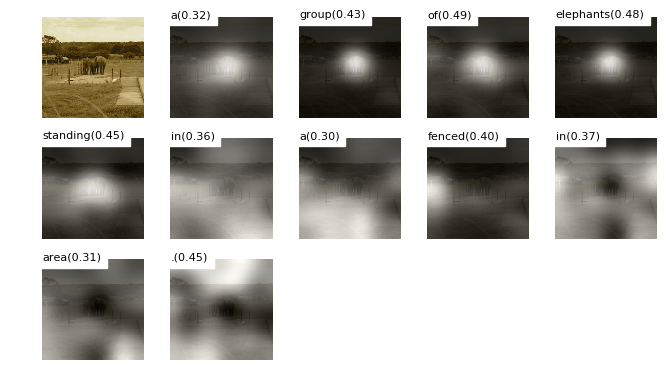

Sampled Caption: a man holding a cell phone in his hand .


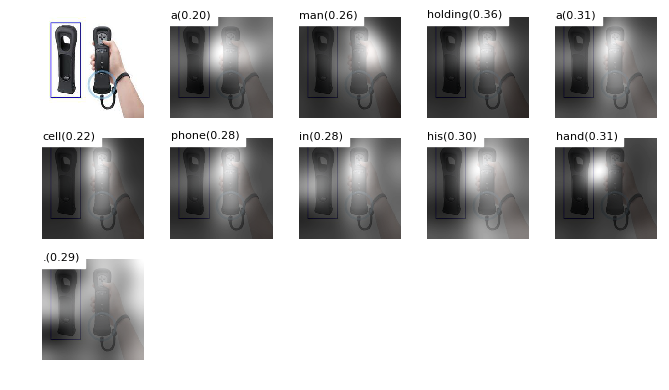

Saved ./data/test/test.candidate.captions.pkl..
